In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
sns.set()

%matplotlib inline

# Основные выводы

**При реализации предварительного анализа данных(EDA), было выявлено:**
- 1)На рынке Авито в разделе торговли мёдом цены имеют нормальное распределение, соответсвенно рынок вполне статичен и не имеет серьёзных динамичных сдвигов(п.3.2);

- 2)При анализе меры центральной тенденции удалось установить, что статистические значения имеют следующе показатели: Mean: 510.49, Median: 350.0, Mode: 566.66, а так же по показателю moda(показатель наибольшего кол-ва повторяющих значений) было установлено, что число наибольших повторений в ценовых величинах, имеют значений: 170 - 6, 500 - 5, 300 - 5(п.3.2);

- 3)Приемущественно торговля осуществляется в Ленинсоком районе г.Томска, доли по размещённым объявлениям следующие: Процент объявлений(%) по районам: Ленинеский-66.5, Кировский-10.45, Советский-9.5, Октябрьский-3.8(п.3.3);

- 4)Цена на рынке варируется от 325 до 900, но более сосредочённый характер цен располагается в интервале от 250-600 (при отсутствие выбросов), а так же максимальное кол-во предложений на рынке имеет объём разнавеса на рынке в литрах: 1, 1.5, и 3 литра,а в кг. 1,1.5, 2(п.3.1);

- 5)После 3-х недель денежная масса на рынке резко сокращается(вероятно продают или снимают объявления)- второе более вероятнее(п.3.1);

- 6)Процент объявлений(%) по образу торговли: Розница-85.5, Опт-4.75 - В выборке приемущественно осуществляется торговля розницей(п.3.3);

- 7)В вещественных данных существует бинарность, в зависимости веса от цены(п.4);

- 8)Максимальное кол-во предложений остаётся на недельном интервале. Самое большое кол-во предложений в литрах, это вес 1(4), 1.5(16) и 3(3) литров, а в кг. это вес 0.66(4), 1(16) и 2(3) кг(п3.1).

- 9)Более ходовые цены весов в кг: (0.12, 0.16, 0.5, 0.7, 1, 2) - более ходовые цены,  в литрах: (0.180, 0.250, 0.5, 0.8, 1, 1.4, 3)- более ходовые цены;

- 10)Благодаря матрице корреляции удалось найти сопутствующие веса, полученным "генеральным"(п.3.4);

**Доп.выводы:**
- 11)При анализе описаний в объявлениях выявлено, что приемущественно все продавцы описывают price не только по заявлеными весам, но и добавляют прочие развесовки, оставляя за собой возможность продажи другого веса по скорректированной цене. - необходимо использовать при подаче объявления.

## Реализация модели ML 

**Для реализации ML была выбрана Log.regression. Модель строилась для тренировки и исследовался признак выявленной бинарной зависимости**

**Можно заключить:*
- Модель, как и ожидалось полность предсказала зависимость;
- Модель предсказала, что объявления будут размещаться в пропорции 1/5 - по массе на каждое расмещённое предложение с продажей по 2 кг, уже будут фигурировать 5 размещённых объявлений по 1 кг(п.4);
- Модель стоит заносить на пайплайн, для дальнейшего обучения и сравнения коэффициентов(п.4);
- Полученные результаты могут быть использованным в дальнейшем, при новом обучении, чтобы определять кол-во предложений в зависимости от веса товара, которые могут появиться на рынке;
- Для более результативного использование ML, необходимо подготовить новые целевые признаки.

## Рекомендации к Бизнесу

**Необходимые меры, для принятия управленческих решений:**
- Необходимо использовать за основу установления ценовой политики, меру центральной тенденции: диапозон цен должен быть в интервале между: median и mean - [350 - 566], при этом взять учесть показатель mode, что большинство цен это 300 и 500;
- В заявке необходимо указывать установленные генеральные веса: 1, 1.5, и 3 литра,а в кг. 1,1.5, 2;
- В объявления в описании по развесу, использовать веса с наибольшей корреляцией по отношению  генеральным весам;
- Учесть тенденцию спроса по генеральным весам;
- Учесть предсказание ML модели по доле.

### 1. Загрузим данные с Avito и исследуем их

In [136]:
data = pd.read_excel('data_TSK.xls')
data

,title,price,lok,time,Kg,Liter,By,info
0,"Мёд дягилевый, дягилевый мед в Томске",1000.0,р-н Ленинский,5 дней назад,NaN,3.0,Роз,"Цена за 3 литра.\nМёд 2022, вкусный, очень аро..."
1,Мед в Томске,1500.0,р-н Ленинский,1 день назад,NaN,3.0,Роз,"Мёд 2022 год, Самарская обл., своя пасека, цве..."
2,Мёд в Томске,1250.0,р-н Кировский,2 недели назад,NaN,3.0,Роз,"Мёд.\nИз Кемеровской области, п/ст Арлюк.\n3 л..."
3,Мёд алтайский и продукты пчеловодства в Томске,266.0,р-н Ленинский,1 неделю назад,1.5,NaN,Роз,Алтайский мёд! Подсолнечник-гречиха Район пасе...
4,Мед 3 литра свежий 2022 в Томске,1300.0,р-н Ленинский,3 недели назад,NaN,3.0,Роз,Мёд цветочный 2022года ( луговые цветы).\nКачк...
...,...,...,...,...,...,...,...,...
114,"Мед Алтайский, перга, прополис Тмс в Томске",1500.0,р-н Ленинский,6 марта 23:16,NaN,3.0,Роз,Мёд нaтурaльный бeз добaвoк из Экологически чи...
115,Мёд оптом и в розницу в Краснообске,130.0,р-н Ленинский,1 неделю назад,NaN,NaN,Роз,Продаю Алтайский мёд с семейной пасеки разных ...
116,Мёд высокогорный оптом в Томске,310.0,р-н Ленинский,1 неделю назад,1.0,NaN,Роз,Цена 310р за кг. \n\nМёд высокогорный оптом. С...
117,Продам Натуральный Мёд в Новосибирске,150.0,р-н Ленинский,5 дней назад,0.5,NaN,Роз,Продам натуральный пчелиный мёд с личной пасек...


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   119 non-null    object 
 1   price   118 non-null    float64
 2   lok     119 non-null    object 
 3   time    119 non-null    object 
 4   Kg      34 non-null     float64
 5   Liter   41 non-null     float64
 6   By      117 non-null    object 
 7   info    119 non-null    object 
dtypes: float64(3), object(5)
memory usage: 7.6+ KB


In [138]:
data.index

RangeIndex(start=0, stop=119, step=1)

In [139]:
data.columns

Index(['title', 'price', 'lok', 'time', 'Kg', 'Liter', 'By', 'info'], dtype='object')

In [140]:
data.describe()

,price,Kg,Liter
count,118.000000,34.000000,41.000000
mean,1156.262712,0.909412,1.626829
std,3602.021936,0.512604,1.043917
min,40.000000,0.100000,0.250000
25%,220.000000,0.775000,1.000000
50%,387.000000,1.000000,1.000000
75%,775.000000,1.000000,3.000000
max,30000.000000,3.000000,3.000000


**Исходя из полученной таблицы видно, что в вещественных признаках:**
- Cредние значения:(156.26, 0.9, 1.6)
- Максимальное значени:(30000, 3, 3)
- Минимальное значени:(40, 0.1, 0.25)


In [141]:
#Смотрим кол-во повторяющихся загаловков.
data.shape[0] - data['title'].nunique()

17

In [142]:
# Проверим в каких конкретно столбцах есть дубликаты:
data_postal = data.groupby('title', as_index=False).count().sort_values('title', ascending=False)
data_postal

,title,price,lok,time,Kg,Liter,By,info
101,Шапка флисовая. Двойной флис в Красноярске,1,1,1,0,0,1,1
100,Чудо мёд для мужчин в Томске,3,3,3,0,3,3,3
99,"Халат медицинский; Ирида мед М-041, р.48 в Томске",1,1,1,0,0,1,1
98,"Фуршет кейтеринг, закуски для праздничного сто...",0,1,1,0,0,1,1
97,Фульво-гуминовый комплекс Чёрный мёд в Красноя...,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
4,Ароматическая свеча в Томске,1,1,1,0,0,1,1
3,Аромамасло для свечей в Томске,1,1,1,0,0,1,1
2,Алтайский мед с предгорья (разнотравье) в Томске,1,1,1,0,1,1,1
1,Аккураевый мёд в Краснообске,1,1,1,0,0,1,1


In [143]:
# Удалим дубликаты с помощью функции drop_duplicates:
data.drop_duplicates(subset=['title'], inplace= True)
data

,title,price,lok,time,Kg,Liter,By,info
0,"Мёд дягилевый, дягилевый мед в Томске",1000.0,р-н Ленинский,5 дней назад,NaN,3.0,Роз,"Цена за 3 литра.\nМёд 2022, вкусный, очень аро..."
1,Мед в Томске,1500.0,р-н Ленинский,1 день назад,NaN,3.0,Роз,"Мёд 2022 год, Самарская обл., своя пасека, цве..."
2,Мёд в Томске,1250.0,р-н Кировский,2 недели назад,NaN,3.0,Роз,"Мёд.\nИз Кемеровской области, п/ст Арлюк.\n3 л..."
3,Мёд алтайский и продукты пчеловодства в Томске,266.0,р-н Ленинский,1 неделю назад,1.5,NaN,Роз,Алтайский мёд! Подсолнечник-гречиха Район пасе...
4,Мед 3 литра свежий 2022 в Томске,1300.0,р-н Ленинский,3 недели назад,NaN,3.0,Роз,Мёд цветочный 2022года ( луговые цветы).\nКачк...
...,...,...,...,...,...,...,...,...
114,"Мед Алтайский, перга, прополис Тмс в Томске",1500.0,р-н Ленинский,6 марта 23:16,NaN,3.0,Роз,Мёд нaтурaльный бeз добaвoк из Экологически чи...
115,Мёд оптом и в розницу в Краснообске,130.0,р-н Ленинский,1 неделю назад,NaN,NaN,Роз,Продаю Алтайский мёд с семейной пасеки разных ...
116,Мёд высокогорный оптом в Томске,310.0,р-н Ленинский,1 неделю назад,1.0,NaN,Роз,Цена 310р за кг. \n\nМёд высокогорный оптом. С...
117,Продам Натуральный Мёд в Новосибирске,150.0,р-н Ленинский,5 дней назад,0.5,NaN,Роз,Продам натуральный пчелиный мёд с личной пасек...


In [144]:
# Проверим дибликаты после удаления:
data.shape[0] - data['title'].nunique()

0

### 2. Исследование и обработка пропусков в данных

<AxesSubplot:>

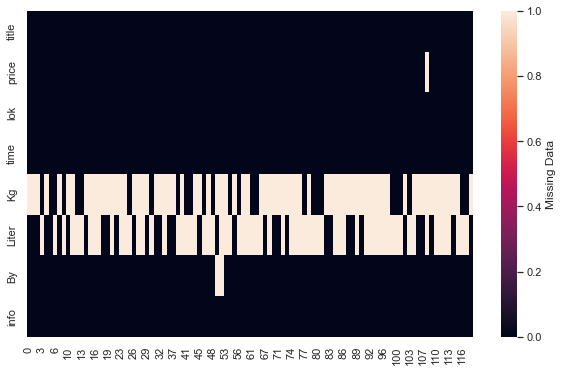

In [145]:
#Поиск пропусков с помощью графика
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
           cbar_kws={'label':'Missing Data'})

In [146]:
# Посчитаем колличество пропусков в данных
data.isna().sum()

title     0
price     1
lok       0
time      0
Kg       75
Liter    67
By        2
info      0
dtype: int64

In [147]:
# Сначала проведём запонения пропусков с использованием соседнего параметра Kg\Liter
data['Kg'] = data['Kg'].fillna(data['Liter'] / 1.5)
data['Liter'] = data['Liter'].fillna(data['Kg'] * 1.5)
data

,title,price,lok,time,Kg,Liter,By,info
0,"Мёд дягилевый, дягилевый мед в Томске",1000.0,р-н Ленинский,5 дней назад,2.000000,3.00,Роз,"Цена за 3 литра.\nМёд 2022, вкусный, очень аро..."
1,Мед в Томске,1500.0,р-н Ленинский,1 день назад,2.000000,3.00,Роз,"Мёд 2022 год, Самарская обл., своя пасека, цве..."
2,Мёд в Томске,1250.0,р-н Кировский,2 недели назад,2.000000,3.00,Роз,"Мёд.\nИз Кемеровской области, п/ст Арлюк.\n3 л..."
3,Мёд алтайский и продукты пчеловодства в Томске,266.0,р-н Ленинский,1 неделю назад,1.500000,2.25,Роз,Алтайский мёд! Подсолнечник-гречиха Район пасе...
4,Мед 3 литра свежий 2022 в Томске,1300.0,р-н Ленинский,3 недели назад,2.000000,3.00,Роз,Мёд цветочный 2022года ( луговые цветы).\nКачк...
...,...,...,...,...,...,...,...,...
114,"Мед Алтайский, перга, прополис Тмс в Томске",1500.0,р-н Ленинский,6 марта 23:16,2.000000,3.00,Роз,Мёд нaтурaльный бeз добaвoк из Экологически чи...
115,Мёд оптом и в розницу в Краснообске,130.0,р-н Ленинский,1 неделю назад,NaN,NaN,Роз,Продаю Алтайский мёд с семейной пасеки разных ...
116,Мёд высокогорный оптом в Томске,310.0,р-н Ленинский,1 неделю назад,1.000000,1.50,Роз,Цена 310р за кг. \n\nМёд высокогорный оптом. С...
117,Продам Натуральный Мёд в Новосибирске,150.0,р-н Ленинский,5 дней назад,0.500000,0.75,Роз,Продам натуральный пчелиный мёд с личной пасек...


In [148]:
# Далее заполним остальные пропуск в Kg\Liter и price заменив их на .median()
data['Kg'] = data['Kg'].fillna(data['Kg'].median())
data['Liter'] = data['Liter'].fillna(data['Liter'].median())
data['price'] = data['price'].fillna(data['price'].median())
data

,title,price,lok,time,Kg,Liter,By,info
0,"Мёд дягилевый, дягилевый мед в Томске",1000.0,р-н Ленинский,5 дней назад,2.000000,3.00,Роз,"Цена за 3 литра.\nМёд 2022, вкусный, очень аро..."
1,Мед в Томске,1500.0,р-н Ленинский,1 день назад,2.000000,3.00,Роз,"Мёд 2022 год, Самарская обл., своя пасека, цве..."
2,Мёд в Томске,1250.0,р-н Кировский,2 недели назад,2.000000,3.00,Роз,"Мёд.\nИз Кемеровской области, п/ст Арлюк.\n3 л..."
3,Мёд алтайский и продукты пчеловодства в Томске,266.0,р-н Ленинский,1 неделю назад,1.500000,2.25,Роз,Алтайский мёд! Подсолнечник-гречиха Район пасе...
4,Мед 3 литра свежий 2022 в Томске,1300.0,р-н Ленинский,3 недели назад,2.000000,3.00,Роз,Мёд цветочный 2022года ( луговые цветы).\nКачк...
...,...,...,...,...,...,...,...,...
114,"Мед Алтайский, перга, прополис Тмс в Томске",1500.0,р-н Ленинский,6 марта 23:16,2.000000,3.00,Роз,Мёд нaтурaльный бeз добaвoк из Экологически чи...
115,Мёд оптом и в розницу в Краснообске,130.0,р-н Ленинский,1 неделю назад,1.000000,1.50,Роз,Продаю Алтайский мёд с семейной пасеки разных ...
116,Мёд высокогорный оптом в Томске,310.0,р-н Ленинский,1 неделю назад,1.000000,1.50,Роз,Цена 310р за кг. \n\nМёд высокогорный оптом. С...
117,Продам Натуральный Мёд в Новосибирске,150.0,р-н Ленинский,5 дней назад,0.500000,0.75,Роз,Продам натуральный пчелиный мёд с личной пасек...


In [149]:
#Удалим NaN в коллонке By
data.dropna(subset=['By'], inplace= True)
data

,title,price,lok,time,Kg,Liter,By,info
0,"Мёд дягилевый, дягилевый мед в Томске",1000.0,р-н Ленинский,5 дней назад,2.000000,3.00,Роз,"Цена за 3 литра.\nМёд 2022, вкусный, очень аро..."
1,Мед в Томске,1500.0,р-н Ленинский,1 день назад,2.000000,3.00,Роз,"Мёд 2022 год, Самарская обл., своя пасека, цве..."
2,Мёд в Томске,1250.0,р-н Кировский,2 недели назад,2.000000,3.00,Роз,"Мёд.\nИз Кемеровской области, п/ст Арлюк.\n3 л..."
3,Мёд алтайский и продукты пчеловодства в Томске,266.0,р-н Ленинский,1 неделю назад,1.500000,2.25,Роз,Алтайский мёд! Подсолнечник-гречиха Район пасе...
4,Мед 3 литра свежий 2022 в Томске,1300.0,р-н Ленинский,3 недели назад,2.000000,3.00,Роз,Мёд цветочный 2022года ( луговые цветы).\nКачк...
...,...,...,...,...,...,...,...,...
114,"Мед Алтайский, перга, прополис Тмс в Томске",1500.0,р-н Ленинский,6 марта 23:16,2.000000,3.00,Роз,Мёд нaтурaльный бeз добaвoк из Экологически чи...
115,Мёд оптом и в розницу в Краснообске,130.0,р-н Ленинский,1 неделю назад,1.000000,1.50,Роз,Продаю Алтайский мёд с семейной пасеки разных ...
116,Мёд высокогорный оптом в Томске,310.0,р-н Ленинский,1 неделю назад,1.000000,1.50,Роз,Цена 310р за кг. \n\nМёд высокогорный оптом. С...
117,Продам Натуральный Мёд в Новосибирске,150.0,р-н Ленинский,5 дней назад,0.500000,0.75,Роз,Продам натуральный пчелиный мёд с личной пасек...


In [150]:
# Посмотрим на результат обработки пропусков.
data.isna().sum()

title    0
price    0
lok      0
time     0
Kg       0
Liter    0
By       0
info     0
dtype: int64

<AxesSubplot:>

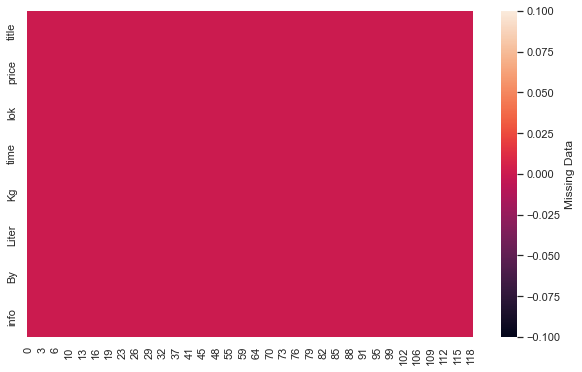

In [151]:
#Поиск пропусков
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
           cbar_kws={'label':'Missing Data'})

## 3. Исследование статистических метрик и распределение данных 

### 3.1 Исследуем вещественные значения в разресе price

In [152]:
# Показатели цен в разрезе киллограмм
data.groupby('Kg')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Kg,,,,,,,,
0.100000,1.0,325.000000,NaN,325.0,325.00,325.0,325.00,325.0
0.120000,2.0,249.500000,212.839141,99.0,174.25,249.5,324.75,400.0
0.166667,2.0,2775.000000,212.132034,2625.0,2700.00,2775.0,2850.00,2925.0
0.330000,1.0,390.000000,NaN,390.0,390.00,390.0,390.00,390.0
0.333333,1.0,330.000000,NaN,330.0,330.00,330.0,330.00,330.0
0.500000,2.0,300.000000,212.132034,150.0,225.00,300.0,375.00,450.0
0.533333,1.0,500.000000,NaN,500.0,500.00,500.0,500.00,500.0
0.666667,12.0,637.500000,298.576167,400.0,487.50,550.0,662.50,1500.0
0.700000,1.0,300.000000,NaN,300.0,300.00,300.0,300.00,300.0


**Из полученных данных видно:**
- Что цена в разрезе кг варируется от 325 до 600 - при учёте отсутствия выбросов;
- В кг.объёмом - (0.1, 0.33, 0.3, 0.53, 0.7, 0.93, 1.5, 3) - имеются устойчивые цены по рынку на текущий момент;
- В кг.объёмом - (0.12, 0.16, 0.5, 0.7, 1, 2) - более ходовые цены, соответсвенной большинство торговли происходит с этими весами;

In [153]:
# Показатели цен в разрезе литров
data.groupby('Liter')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Liter,,,,,,,,
0.150,1.0,325.000000,NaN,325.0,325.00,325.0,325.00,325.0
0.180,2.0,249.500000,212.839141,99.0,174.25,249.5,324.75,400.0
0.250,2.0,2775.000000,212.132034,2625.0,2700.00,2775.0,2850.00,2925.0
0.495,1.0,390.000000,NaN,390.0,390.00,390.0,390.00,390.0
0.500,1.0,330.000000,NaN,330.0,330.00,330.0,330.00,330.0
0.750,2.0,300.000000,212.132034,150.0,225.00,300.0,375.00,450.0
0.800,1.0,500.000000,NaN,500.0,500.00,500.0,500.00,500.0
1.000,12.0,637.500000,298.576167,400.0,487.50,550.0,662.50,1500.0
1.050,1.0,300.000000,NaN,300.0,300.00,300.0,300.00,300.0


**Ситуация с литрами, повторяет ситуацию с кг, (отличается развесовка):**
- Цена в разрезе кг варируется от 325 до 900 - при учёте отсутствия выбросов;
- В литр.объёмом - (0.150, 0.495, 0.75, 0.5, 1.05, 0.93, 1.5,2.25, 3,4.5) - имеются устойчивые цены по рынку на текущий момент;
- В литр.объёмом - (0.180, 0.250, 0.5, 0.8, 1, 1.4, 3) - более ходовые цены, соответсвенной большинство торговли происходит с этими весами;

In [154]:
# Показатели цен в разрезе районов
data.groupby('lok')['price'].agg(['min','max','mean'])

,min,max,mean
lok,,,
р-н Кировский,200.0,1250.0,523.181818
р-н Ленинский,40.0,30000.0,1248.693333
р-н Октябрьский,70.0,700.0,392.500000
р-н Советский,210.0,1700.0,697.000000


**Районый разброс цен**
- Сильный разброс цен, в Лененском районе есть выбросы;

### 3.2 Исследуем распределение целевого признака price 

[40.0, 70.0, 90.0, 99.0, 100.0, 100.0, 110.0, 120.0, 120.0, 130.0, 130.0, 150.0, 150.0, 169.0, 170.0, 170.0, 170.0, 170.0, 170.0, 170.0, 200.0, 210.0, 211.0, 220.0, 250.0, 250.0, 250.0, 266.0, 270.0, 270.0, 275.0, 285.0, 290.0, 299.0, 299.0, 300.0, 300.0, 300.0, 300.0, 300.0, 310.0, 325.0, 330.0, 330.0, 350.0, 350.0, 350.0, 350.0, 384.0, 390.0, 390.0, 400.0, 400.0, 400.0, 400.0, 435.0, 450.0, 450.0, 450.0, 460.0, 500.0, 500.0, 500.0, 500.0, 500.0, 600.0, 600.0, 650.0, 650.0, 650.0, 650.0, 700.0, 700.0, 700.0, 700.0, 800.0, 800.0, 800.0, 900.0, 900.0, 900.0, 1000.0, 1000.0, 1000.0, 1000.0, 1200.0, 1250.0, 1300.0, 1300.0, 1500.0, 1500.0, 1500.0, 1500.0, 1700.0, 1900.0, 2400.0, 2625.0, 2925.0, 21500.0, 30000.0]
median - 390.0
mean - 1079.47
mode -170.0


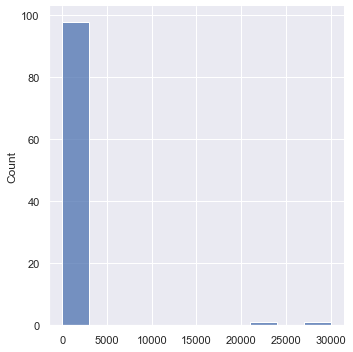

In [155]:
x =np.array(data['price'])
print(sorted(x))
print(f'median - {np.quantile(x, q = 0.5)}\nmean - {np.mean(x)}\nmode -{stats.mode(x)[0][0]}' )
sns.displot(x, bins=10);

Видны выбросы, среднее значение находится от 0 до 2500р.

[3.6888794541139363, 4.248495242049359, 4.499809670330265, 4.59511985013459, 4.605170185988092, 4.605170185988092, 4.700480365792417, 4.787491742782046, 4.787491742782046, 4.867534450455582, 4.867534450455582, 5.0106352940962555, 5.0106352940962555, 5.1298987149230735, 5.135798437050262, 5.135798437050262, 5.135798437050262, 5.135798437050262, 5.135798437050262, 5.135798437050262, 5.298317366548036, 5.3471075307174685, 5.351858133476067, 5.393627546352362, 5.521460917862246, 5.521460917862246, 5.521460917862246, 5.583496308781699, 5.598421958998375, 5.598421958998375, 5.616771097666572, 5.652489180268651, 5.66988092298052, 5.700443573390687, 5.700443573390687, 5.703782474656201, 5.703782474656201, 5.703782474656201, 5.703782474656201, 5.703782474656201, 5.736572297479192, 5.783825182329737, 5.799092654460526, 5.799092654460526, 5.857933154483459, 5.857933154483459, 5.857933154483459, 5.857933154483459, 5.950642552587727, 5.966146739123692, 5.966146739123692, 5.991464547107982, 5.991464

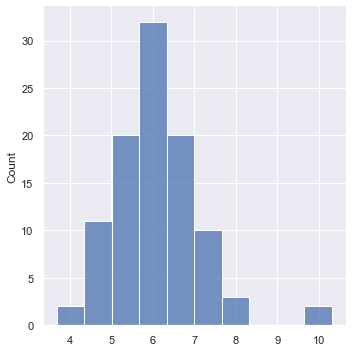

In [156]:
# посчитаем логарифм, чтобы убрать эффект выброса:
x =np.log(np.array(data['price']))
print(sorted(x))
print(f'median - {np.quantile(x, q = 0.5)}\nmean - {np.mean(x)}\nmode -{stats.mode(x)[0][0]}' )
sns.displot(x, bins=10);

Применив функцию np.log, удалось посмотреть на наши данные более чётче. Можно сказать, что распределение вероятностей является нормальным, соответсвенно можно заключить, что рынок подченяется нормальному закону распределения.

In [157]:
np.exp(4), np.exp(8)

(54.598150033144236, 2980.9579870417283)

Цены измеряются от 54р до 2980р (с учётом имеющихся выбрасов)

Text(0.5, 0.98, 'Describution of price')

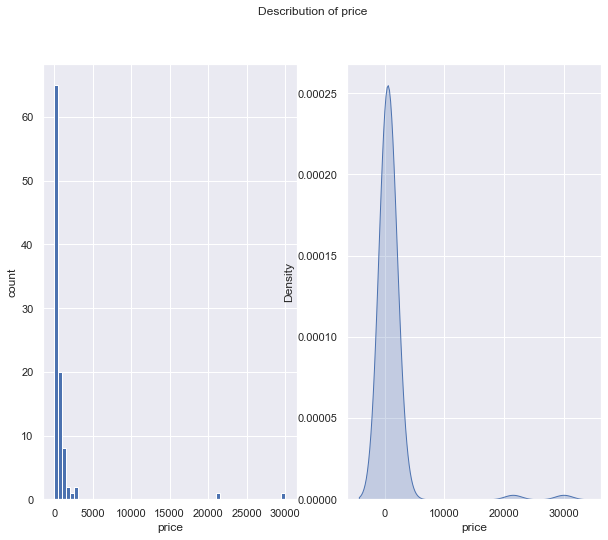

In [158]:
plt.figure(figsize=(10,8))

plt.subplot(121)
data['price'].hist(density=False, bins=60)
plt.ylabel('count')
plt.xlabel('price')

plt.subplot(122)
sns.kdeplot(data['price'], shade=True, legend=False)
plt.xlabel('price')

plt.suptitle('Describution of price')

Ядерный график подтверждает нормальность в данных

In [159]:
# Мера центральной тенденции:
# Оценки для изучение меры:
price_mean =  np.log10(round(data['price'].mean(), 2))
price_median =  np.log10(data['price'].median())
price_mode =  np.log10(data['price'].mode()[0])

print(f'Mean: {price_mean}, Median: {price_median}, Mode: {price_mode}')

Mean: 3.033210577179281, Median: 2.591064607026499, Mode: 2.230448921378274


In [160]:
# Истенные оценки
price_mean_1 =  round(data['price'].mean(), 2)
price_median_1 =  data['price'].median()
price_mode_1 =  data['price'].mode()[0]
print(f'Mean: {price_mean_1}, Median: {price_median_1}, Mode: {price_mode_1}')

Mean: 1079.47, Median: 390.0, Mode: 170.0


C:\Users\roman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roman\AppData\Local\Temp\ipykernel_11244\1545990742.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot([price_mean] * 1000 , np.abs(np.log10(y)), label='mean',linestyle=':', linewidth=4)
C:\Users\roman\AppData\Local\Temp\ipykernel_11244\1545990742.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot([price_median] * 1000, np.abs(np.log10(y)), label='median', linestyle='--',linewidth=4)
C:\Users\roman\AppData\Local\Temp\ipykernel_11244\1545990742.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot([price_mode] * 1000, np.abs(np.log10(y)), label='mode', linestyle='-.', linewidth=4

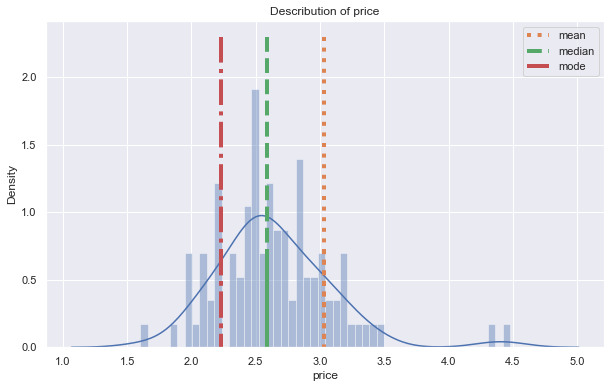

In [161]:
plt.figure(figsize = (10, 6))
sns.distplot(np.log10(data['price']), bins=50)

y = np.linspace(0, 5, 1000)
plt.plot([price_mean] * 1000 , np.abs(np.log10(y)), label='mean',linestyle=':', linewidth=4)
plt.plot([price_median] * 1000, np.abs(np.log10(y)), label='median', linestyle='--',linewidth=4)
plt.plot([price_mode] * 1000, np.abs(np.log10(y)), label='mode', linestyle='-.', linewidth=4)

plt.title('Describution of price')
plt.legend()
plt.show()

Наложив на распределение показатели mean, moda, median можно сказать, что статистика подтверждается нормальность в данных.

Показатель moda является категориальной оценкой признаков, поэтому она не находится в диапозоне между median и mean.

In [162]:
data['price'].value_counts()

170.0      6
500.0      5
300.0      5
1000.0     4
400.0      4
650.0      4
1500.0     4
700.0      4
350.0      4
900.0      3
450.0      3
250.0      3
800.0      3
299.0      2
100.0      2
330.0      2
390.0      2
600.0      2
270.0      2
130.0      2
120.0      2
150.0      2
1300.0     2
460.0      1
435.0      1
21500.0    1
40.0       1
30000.0    1
211.0      1
110.0      1
90.0       1
2400.0     1
1200.0     1
290.0      1
1900.0     1
210.0      1
275.0      1
99.0       1
169.0      1
2625.0     1
1700.0     1
220.0      1
2925.0     1
70.0       1
384.0      1
200.0      1
325.0      1
285.0      1
266.0      1
1250.0     1
310.0      1
Name: price, dtype: int64

Кол-во цен по группам

In [163]:
# Преобразуем mode в категориальный признак:

price_bins = data['price'] / 600 * 2000

price_mode = price_bins.mode()[0]
price_mode

566.6666666666666

C:\Users\roman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roman\AppData\Local\Temp\ipykernel_11244\2847369054.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot([price_mean] * 1000, np.abs(np.log10(y)), label='mean',linestyle=':', linewidth=4)
C:\Users\roman\AppData\Local\Temp\ipykernel_11244\2847369054.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot([price_median] * 1000, np.abs(np.log10(y)), label='median', linestyle='--',linewidth=4)
C:\Users\roman\AppData\Local\Temp\ipykernel_11244\2847369054.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot([price_mode] * 1000, np.abs(np.log10(y)), label='mode', linestyle='-.', linewidth

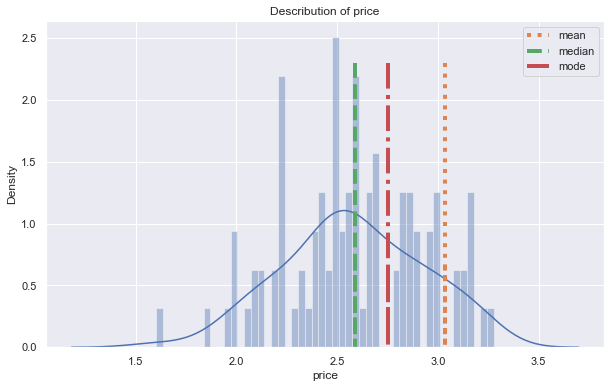

In [164]:
#Отбросим выбросы из данных:


df = data[data['price'] < 2000]
plt.figure(figsize = (10, 6))

sns.distplot(np.log10(df['price']), bins=50)

price_mode = np.log10(price_mode) #df['price'].mode()[0]


y = np.linspace(0, 5, 1000)
plt.plot([price_mean] * 1000, np.abs(np.log10(y)), label='mean',linestyle=':', linewidth=4)
plt.plot([price_median] * 1000, np.abs(np.log10(y)), label='median', linestyle='--',linewidth=4)
plt.plot([price_mode] * 1000, np.abs(np.log10(y)), label='mode', linestyle='-.', linewidth=4)

plt.title('Describution of price')
plt.legend()
plt.show()

In [166]:
# Истенные оценки
price_mean_1 =  round(df['price'].mean(), 2)
price_median_1 =  df['price'].median()
price_mode_1 =  df['price'] / 600 * 2000
price_mode_1 = price_bins.mode()[0]

print(f'Mean: {price_mean_1}, Median: {price_median_1}, Mode: {price_mode_1}')

Mean: 510.49, Median: 350.0, Mode: 566.6666666666666


**Выводы по изучению центральной тенденции:**

- После преобразования признака, получили правильную оценку moda;
- После отчистки данных полученно более оптимальное значение mean, теперь его можно использовать в рекомендациях к бизнесу;
- Так же по показателю moda удалось установить число наибольших повторений в ценовых величинах, такие величины имеют значений: 170 - 6, 500 - 5, 300 - 5.  

## 3. Анализ признаков

### 3.1 Сделаем feature eingineering и сводную таблицу

In [167]:
# Создадим новый признак из имеющегося "time" для следующего исследование данных:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['time'])
df['time_1']= le.transform(df['time'])
df.head()

C:\Users\roman\AppData\Local\Temp\ipykernel_11244\272513025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_1']= le.transform(df['time'])


,title,price,lok,time,Kg,Liter,By,info,time_1
0,"Мёд дягилевый, дягилевый мед в Томске",1000.0,р-н Ленинский,5 дней назад,2.0,3.00,Роз,"Цена за 3 литра.\nМёд 2022, вкусный, очень аро...",10
1,Мед в Томске,1500.0,р-н Ленинский,1 день назад,2.0,3.00,Роз,"Мёд 2022 год, Самарская обл., своя пасека, цве...",0
2,Мёд в Томске,1250.0,р-н Кировский,2 недели назад,2.0,3.00,Роз,"Мёд.\nИз Кемеровской области, п/ст Арлюк.\n3 л...",6
3,Мёд алтайский и продукты пчеловодства в Томске,266.0,р-н Ленинский,1 неделю назад,1.5,2.25,Роз,Алтайский мёд! Подсолнечник-гречиха Район пасе...,1
4,Мед 3 литра свежий 2022 в Томске,1300.0,р-н Ленинский,3 недели назад,2.0,3.00,Роз,Мёд цветочный 2022года ( луговые цветы).\nКачк...,8


Для проведения **feature eingineering** используем **LabelEncoder**, чтобы произвести разметку

In [168]:
df.groupby('time_1')['time'].sum()

time_1
0                  1 день назад1 день назад1 день назад
1     1 неделю назад1 неделю назад1 неделю назад1 не...
2                                1 час назад1 час назад
3                                        12 часов назад
4                          18 часов назад18 часов назад
5          2 дня назад2 дня назад2 дня назад2 дня назад
6     2 недели назад2 недели назад2 недели назад2 не...
7     3 дня назад3 дня назад3 дня назад3 дня назад3 ...
8     3 недели назад3 недели назад3 недели назад3 не...
9          4 дня назад4 дня назад4 дня назад4 дня назад
10    5 дней назад5 дней назад5 дней назад5 дней наз...
11    6 дней назад6 дней назад6 дней назад6 дней наз...
12                                        6 марта 10:48
13                                        6 марта 20:19
14                                        6 марта 23:16
15                                        7 марта 00:18
16                                        7 часов назад
17                                       

In [169]:
def f(df):
    if df['time_1'] in [0, 2, 3, 4, 16, 17]:
        val = '1 день'
    elif df['time_1'] == 5:
        val = '2 день'
    elif df['time_1'] == 7:
        val = '3 день'
    elif df['time_1'] == 9:
        val = '4 день'
    elif df['time_1'] == 10:
        val = '5 день'
    elif df['time_1'] == 11:
        val = '6 день'
    elif df['time_1'] == 1:
        val = '1 Неделя'
    elif df['time_1'] == 6:
        val = '2 Недели'
    elif df['time_1'] == 8:
        val = '3 Недели'
    elif df['time_1'] in [12, 13, 14, 15]:
        val = 'Больше Месяца'
    return val
     
df['time_2'] = df.apply(f, axis=1)
df.drop(columns = ['time_1'], axis = 1,  inplace = True)
df.head()

C:\Users\roman\AppData\Local\Temp\ipykernel_11244\1158005830.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_2'] = df.apply(f, axis=1)
C:\Users\roman\AppData\Local\Temp\ipykernel_11244\1158005830.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['time_1'], axis = 1,  inplace = True)


,title,price,lok,time,Kg,Liter,By,info,time_2
0,"Мёд дягилевый, дягилевый мед в Томске",1000.0,р-н Ленинский,5 дней назад,2.0,3.00,Роз,"Цена за 3 литра.\nМёд 2022, вкусный, очень аро...",5 день
1,Мед в Томске,1500.0,р-н Ленинский,1 день назад,2.0,3.00,Роз,"Мёд 2022 год, Самарская обл., своя пасека, цве...",1 день
2,Мёд в Томске,1250.0,р-н Кировский,2 недели назад,2.0,3.00,Роз,"Мёд.\nИз Кемеровской области, п/ст Арлюк.\n3 л...",2 Недели
3,Мёд алтайский и продукты пчеловодства в Томске,266.0,р-н Ленинский,1 неделю назад,1.5,2.25,Роз,Алтайский мёд! Подсолнечник-гречиха Район пасе...,1 Неделя
4,Мед 3 литра свежий 2022 в Томске,1300.0,р-н Ленинский,3 недели назад,2.0,3.00,Роз,Мёд цветочный 2022года ( луговые цветы).\nКачк...,3 Недели


Собрали новый признак - **time_2**

In [170]:
cn = sns.light_palette('green', as_cmap = True)

data_cross = pd.crosstab(index=df['Liter'],
                         columns=df['time_2'],
                         values=df['price'],
                         aggfunc='sum',
                         margins=True)

data_cross.fillna(0, inplace = True)
data_cross = data_cross[['1 день', '2 день', '3 день',
                         '4 день', '5 день', '6 день',
                         '1 Неделя','2 Недели','3 Недели',
                         'Больше Месяца' ]].style.background_gradient(cmap = cn)
data_cross

time_2,1 день,2 день,3 день,4 день,5 день,6 день,1 Неделя,2 Недели,3 Недели,Больше Месяца
Liter,,,,,,,,,,
0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,325.000000,0.000000,0.000000
0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.000000,99.000000,0.000000,0.000000
0.495000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,390.000000,0.000000
0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,330.000000,0.000000,0.000000,0.000000,0.000000
0.750000,0.000000,0.000000,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000
1.000000,450.000000,0.000000,0.000000,1150.000000,500.000000,0.000000,2350.000000,0.000000,2200.000000,1000.000000
1.050000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.400000,0.000000,0.000000,700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [171]:
df.groupby(df['time_2'])['price'].sum().sort_values(ascending=True)

time_2
4 день            1700.0
3 день            1859.0
2 день            2220.0
Больше Месяца     2610.0
6 день            3520.0
5 день            3850.0
1 день            4885.0
2 Недели          5032.0
1 Неделя         11137.0
3 Недели         11684.0
Name: price, dtype: float64

**По полученным данным в таблице видим(в разрезе литров):**
- Максимальный объём денежной массы скопился на 1 - ой и 3 - ий неделях;
- Торговля осуществляется приемущественно в объёмах 1, 1.5, и 3 литра.

In [172]:
cn = sns.light_palette('green', as_cmap = True)

data_cross = pd.crosstab(index=df['Kg'],
                         columns=df['time_2'],
                         values=df['price'],
                         aggfunc='sum',
                         margins=True)

data_cross.fillna(0, inplace = True)
data_cross = data_cross[['1 день', '2 день', '3 день',
                         '4 день', '5 день', '6 день',
                         '1 Неделя','2 Недели','3 Недели',
                         'Больше Месяца' ]].style.background_gradient(cmap = cn)
data_cross

time_2,1 день,2 день,3 день,4 день,5 день,6 день,1 Неделя,2 Недели,3 Недели,Больше Месяца
Kg,,,,,,,,,,
0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,325.000000,0.000000,0.000000
0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.000000,99.000000,0.000000,0.000000
0.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,390.000000,0.000000
0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,330.000000,0.000000,0.000000,0.000000,0.000000
0.500000,0.000000,0.000000,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000
0.666667,450.000000,0.000000,0.000000,1150.000000,500.000000,0.000000,2350.000000,0.000000,2200.000000,1000.000000
0.700000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.933333,0.000000,0.000000,700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**По полученным данным в таблице видим(в разрезе кг):**
- Максимальный объём денежной массы скопился на 1 - ой и 3 - ий недели, так же, как и в литровом измерителе;
- Торговля осуществляется приемущественно в объёмах 1 и 2 кг.

In [173]:
cn = sns.light_palette('green', as_cmap = True)
df2 = pd.crosstab(df['time_2'],
                df['Liter'])

df2['sum'] = df2.sum(axis=1)
df2['mean'] = df2.mean(axis=1)

df2 = df2.sort_values(by=['sum'], ascending=True)
df2 = df2.style.background_gradient(cmap = cn)
df2

Liter,0.150000,0.180000,0.495000,0.500000,0.750000,0.800000,1.000000,1.050000,1.400000,1.500000,2.250000,3.000000,4.500000,sum,mean
time_2,,,,,,,,,,,,,,,
2 день,0,0,0,0,0,0,0,0,0,4,0,0,0,4,0.571429
4 день,0,0,0,0,0,0,2,0,0,2,0,0,0,4,0.571429
Больше Месяца,0,0,0,0,0,0,2,0,0,1,0,1,0,4,0.571429
3 день,0,0,0,0,0,0,0,1,1,4,0,0,0,6,0.857143
5 день,0,0,0,0,2,0,1,0,0,3,0,1,0,7,1.000000
6 день,0,0,0,1,0,0,0,0,0,5,0,1,0,7,1.000000
1 день,0,0,0,0,0,0,1,0,0,7,0,2,0,10,1.428571
2 Недели,1,1,0,0,0,0,0,0,0,6,0,3,0,11,1.571429
3 Недели,0,0,1,0,0,1,2,0,0,9,0,3,0,16,2.285714


In [174]:
df.groupby(df['time_2'])['Liter'].sum().sort_values(ascending=True)

time_2
4 день            5.000
2 день            6.000
Больше Месяца     6.500
3 день            8.450
5 день           10.000
6 день           11.000
1 день           17.500
2 Недели         18.330
3 Недели         25.795
1 Неделя         43.930
Name: Liter, dtype: float64

**По полученным колличественным данным в таблице видим:(в разрезе литров):**
- Максимальное кол-во предложений находится на недельном интервале и далее по списку вверх;
- Самое большое кол-во предложений, это вес 1(4), 1.5(16) и 3(3) литров.

In [175]:
cn = sns.light_palette('green', as_cmap = True)
df2 = pd.crosstab(df['time_2'],
                df['Kg'])

df2['sum'] = df2.sum(axis=1)
df2['mean'] = df2.mean(axis=1)

df2 = df2.sort_values(by=['sum'], ascending=True)
df2 = df2.style.background_gradient(cmap = cn)
df2

Kg,0.100000,0.120000,0.330000,0.333333,0.500000,0.533333,0.666667,0.700000,0.933333,1.000000,1.500000,2.000000,3.000000,sum,mean
time_2,,,,,,,,,,,,,,,
2 день,0,0,0,0,0,0,0,0,0,4,0,0,0,4,0.571429
4 день,0,0,0,0,0,0,2,0,0,2,0,0,0,4,0.571429
Больше Месяца,0,0,0,0,0,0,2,0,0,1,0,1,0,4,0.571429
3 день,0,0,0,0,0,0,0,1,1,4,0,0,0,6,0.857143
5 день,0,0,0,0,2,0,1,0,0,3,0,1,0,7,1.000000
6 день,0,0,0,1,0,0,0,0,0,5,0,1,0,7,1.000000
1 день,0,0,0,0,0,0,1,0,0,7,0,2,0,10,1.428571
2 Недели,1,1,0,0,0,0,0,0,0,6,0,3,0,11,1.571429
3 Недели,0,0,1,0,0,1,2,0,0,9,0,3,0,16,2.285714


In [176]:
df.groupby(df['time_2'])['Kg'].sum().sort_values(ascending=True)

time_2
4 день            3.333333
2 день            4.000000
Больше Месяца     4.333333
3 день            5.633333
5 день            6.666667
6 день            7.333333
1 день           11.666667
2 Недели         12.220000
3 Недели         17.196667
1 Неделя         29.286667
Name: Kg, dtype: float64

**По полученным колличественным данным в таблице видим:(в разрезе кг):**
- Временной отрезок распределения повторяется так же, как и в кг;
- Самое большое кол-во предложений, это вес 0.66(4), 1(16) и 2(3) кг.

### 3.2 Вещественные значения

In [177]:
data_num_features = df.select_dtypes(include=['float64','float32','float16'])
data_num_features.drop('price', axis=1, inplace= True)

In [178]:
data_num_features.head()

,Kg,Liter
0,2.0,3.00
1,2.0,3.00
2,2.0,3.00
3,1.5,2.25
4,2.0,3.00


C:\Users\roman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

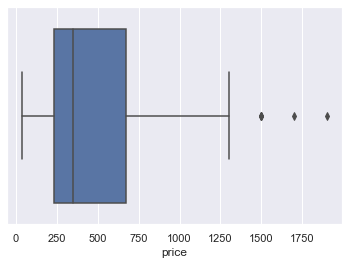

In [179]:
sns.boxplot(df['price'])

In [180]:
# Выбросы по цене:
df[df['price'] > 1250]

,title,price,lok,time,Kg,Liter,By,info,time_2
1,Мед в Томске,1500.0,р-н Ленинский,1 день назад,2.000000,3.0,Роз,"Мёд 2022 год, Самарская обл., своя пасека, цве...",1 день
4,Мед 3 литра свежий 2022 в Томске,1300.0,р-н Ленинский,3 недели назад,2.000000,3.0,Роз,Мёд цветочный 2022года ( луговые цветы).\nКачк...,3 Недели
37,Мед высокогорный в Томске,1700.0,р-н Советский,6 дней назад,2.000000,3.0,Роз,Мёд свежий со своей пасеки села Сентелек горно...,6 день
67,Мед и продукты Пчеловодства Томск в Томске,1300.0,р-н Ленинский,1 неделю назад,2.000000,3.0,Роз,Мёд нaтурaльный бeз добaвoк из экологически чи...,1 Неделя
73,Продам мед в Минусинске,1500.0,р-н Ленинский,3 недели назад,2.000000,3.0,Роз,"Продам мёд, разнотравье из экологически чистог...",3 Недели
84,Кондиционер shea moisture в Новосибирске,1900.0,р-н Ленинский,3 недели назад,1.000000,1.5,Роз,Новый. Мёд манука. Хорошо увлажняет и разглажи...,3 Недели
102,Каштановый мёд натуральный в Томске,1500.0,р-н Ленинский,3 недели назад,0.666667,1.0,Роз,Продаю каштановый мёд 1500р/1л. А также большо...,3 Недели
114,"Мед Алтайский, перга, прополис Тмс в Томске",1500.0,р-н Ленинский,6 марта 23:16,2.000000,3.0,Роз,Мёд нaтурaльный бeз добaвoк из Экологически чи...,Больше Месяца


**Получены выбросы по price**

### 3.3 Категориальные признаки

<AxesSubplot:xlabel='By', ylabel='count'>

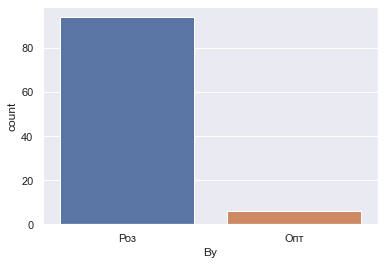

In [181]:
sns.countplot(x = 'By', data=data)

In [255]:
sum_ = df['By'].str.contains('Роз').sum() + df['By'].str.contains('Опт').sum()
Roz = (sum_ / 100)*df['By'].str.contains('Роз').sum()
Opt = (sum_ / 100)*df['By'].str.contains('Опт').sum()

print(f'Процент объявлений(%) по образу торговли: Розница-{Roz}, Опт-{Opt}')

Процент объявлений(%) по образу торговли: Розница-85.5, Опт-4.75


Приемущественно в выборки выступает розница.

C:\Users\roman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


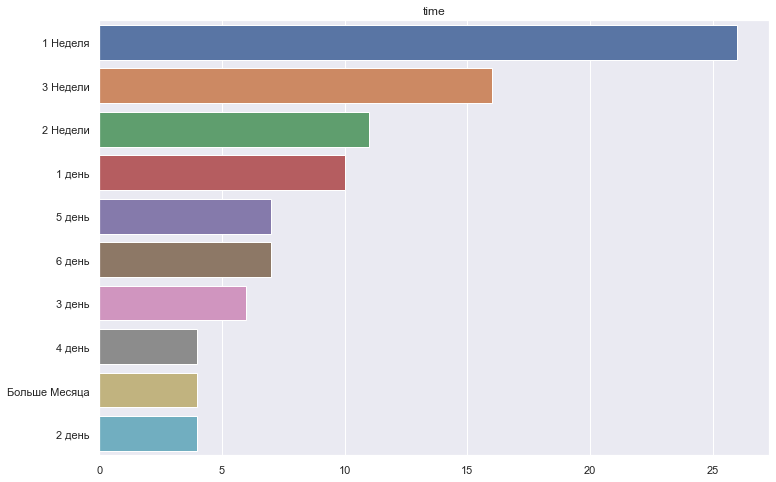

In [182]:
count = df['time_2'].value_counts()

plt.figure(figsize=(12,8))
plt.title('time')
sns.barplot(count.values,count.index)

plt.show()

Максимальное кол-во предложений занимает время пребываение около 1 недели.

C:\Users\roman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


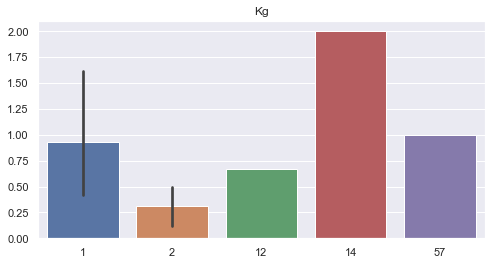

In [183]:
count = df['Kg'].value_counts()

plt.figure(figsize=(8,4))
plt.title('Kg')
sns.barplot(count.values, count.index)

plt.show()

В разрезе кг. позиции 2(14) и 1(57), занимают большее кол-во предложений на рынке.

C:\Users\roman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


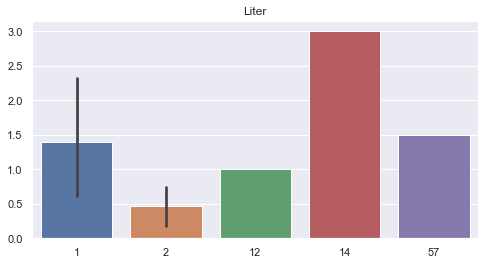

In [184]:
count = df['Liter'].value_counts()

plt.figure(figsize=(8,4))
plt.title('Liter')
sns.barplot(count.values ,count.index)

plt.show()

В разрезе литров, позиции 1(12), 1.5(57) и 3(14), занимают большее кол-во предложений на рынке.

р-н Ленинский      70
р-н Кировский      11
р-н Советский      10
р-н Октябрьский     4
Name: lok, dtype: int64


C:\Users\roman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


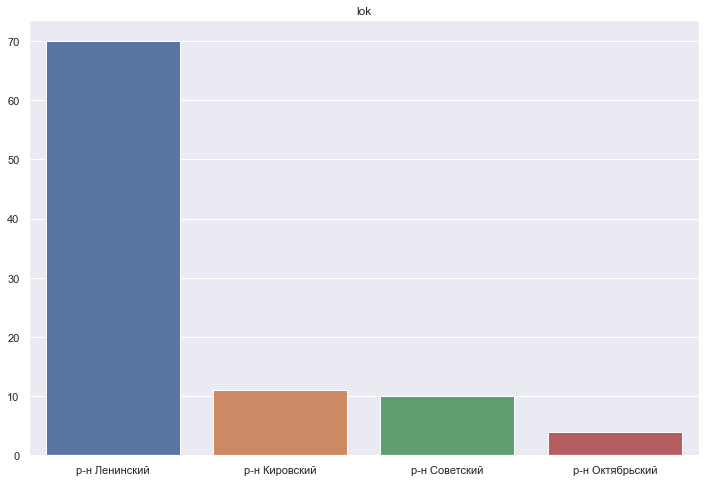

In [185]:
count = df['lok'].value_counts()
print(count);

plt.figure(figsize=(12,8))
plt.title('lok')
sns.barplot(count.index, count.values)
plt.show();

In [186]:
sum_ = (df['lok'].str.contains('р-н Ленинский').sum() + df['lok'].str.contains('р-н Кировский').sum() + df['lok'].str.contains('р-н Советский').sum() + df['lok'].str.contains('р-н Октябрьский').sum())
Len = (sum_ / 100)*df['lok'].str.contains('р-н Ленинский').sum()
Kir = (sum_ / 100)*df['lok'].str.contains('р-н Кировский').sum()
Sov = (sum_ / 100)*df['lok'].str.contains('р-н Советский').sum()
Okt = (sum_ / 100)*df['lok'].str.contains('р-н Октябрьский').sum()
print(f'Процент объявлений(%) по районам: Ленинеский-{Len}, Кировский-{Kir}, Советский-{Sov}, Октябрьский-{Okt} ')

Процент объявлений(%) по районам: Ленинеский-66.5, Кировский-10.45, Советский-9.5, Октябрьский-3.8 


Большинство предложений сосредоточены в Ленинском районе (66.5%) г.Томска.

## 3.4 Матрица корреляции

Первая матрица корреляции сильно коррелированна по  причине того, что признак сопоставлен самому себе. Поэтому результаты не  объективны, однако имеет смысл посмотреть на них, для учёта зависимости дня от дней.

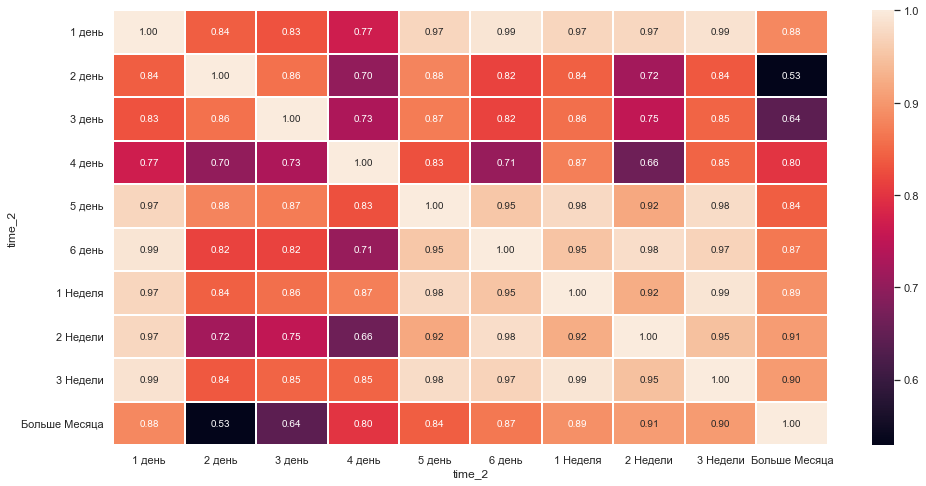

In [187]:
data_cross = pd.crosstab(index=df['Liter'],
                         columns=df['time_2'],
                         values=df['price'],
                         aggfunc='sum',
                         margins=True)

data_cross.fillna(0, inplace = True)
data_cross = data_cross[['1 день', '2 день', '3 день',
                         '4 день', '5 день', '6 день',
                         '1 Неделя','2 Недели','3 Недели',
                         'Больше Месяца' ]]

corr = data_cross.corr()

f, ax = plt.subplots(figsize =(16,8))
sns.heatmap(corr, annot = True, linewidths=1.5, fmt ='.2f', ax=ax)
plt.show()

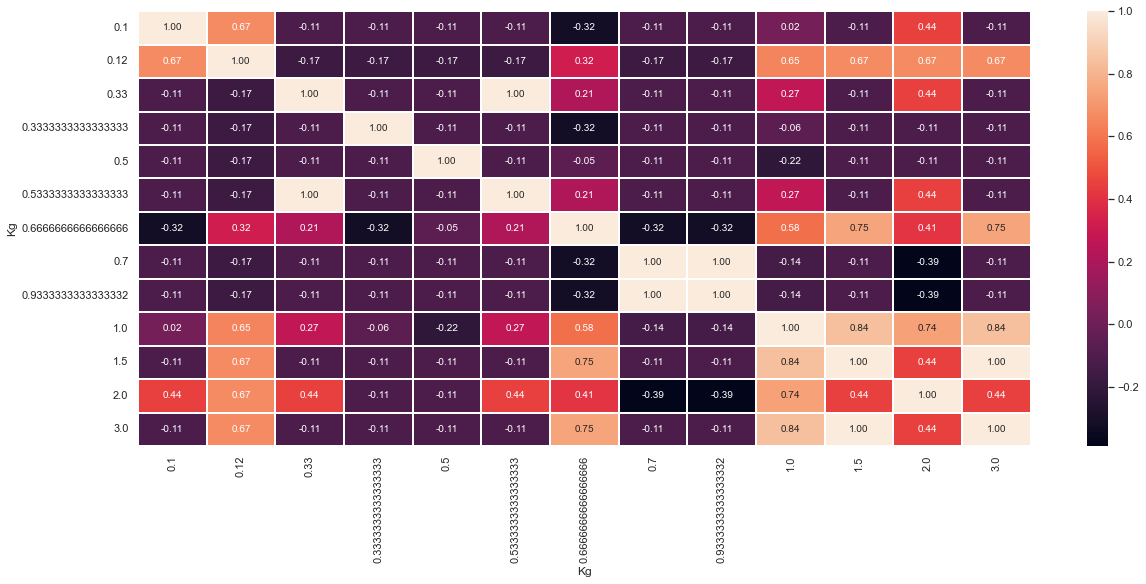

In [188]:
df2 = pd.crosstab(df['time_2'],
                df['Kg'])


corr = df2.corr()

f, ax = plt.subplots(figsize =(20,8))
sns.heatmap(corr, annot = True, linewidths=1.5, fmt ='.2f', ax=ax)
plt.show()

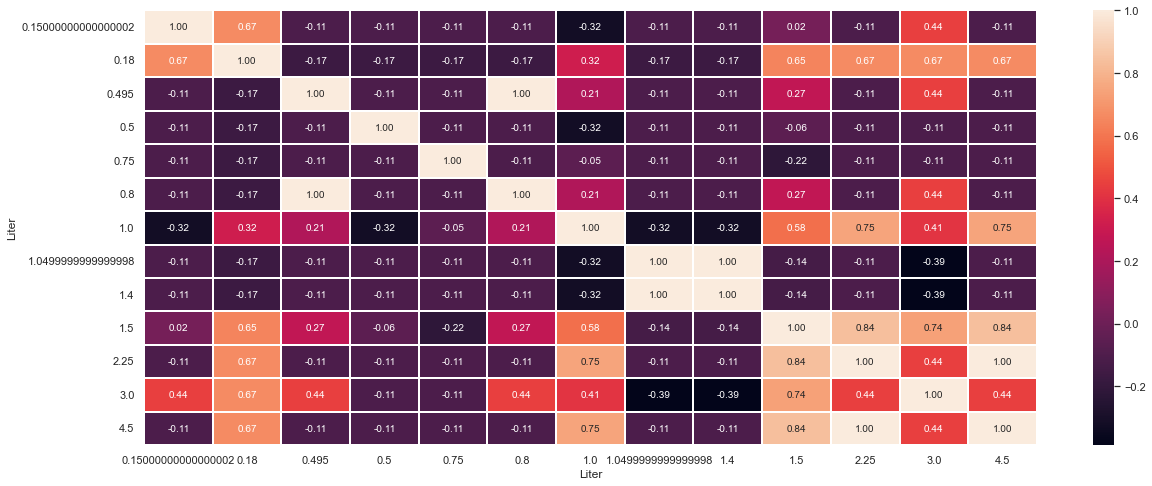

In [189]:
df2 = pd.crosstab(df['time_2'],
                df['Liter'])


corr = df2.corr()

f, ax = plt.subplots(figsize =(20,8))
sns.heatmap(corr, annot = True, linewidths=1.5, fmt ='.2f', ax=ax)
plt.show()

**Другие две матрицы корреляции выражают общую зависимость**

**В киллограмах по сильной зависимости:**
- 0.1 сопоставим с весами - 0.67;
- 0.12 сопоставим с весами - 0.1, 1, 1.5, 2, 3;
- 0.33 сопоставим с весами - 0.53, 2;
- 0.66 сопоставим с весами - 1, 1.5, 2, 3;
- 0.7 сопоставим с весами - 0.93;
- 0.93 сопоставим с весами - 0.7;
- 1 сопоставим с весами - 0.12, 0.66, 1.5, 2, 3;
- 1.5 сопоставим с весами - 0.12, 0.75, 0.84, 0.44;
- 2 сопоставим с весами - 0.1, 0.12, 0.53, 0.66, 1, 1.5, 3;
- 3 сопоставим с весами - 0.12, 0.66, 1, 1.5, 2;


**В литрах по сильной зависимости:**
- 0.15 сопоставим с литрами - 1.5, 2.25, 3, 4.5;
- 1.5 сопоставим с литрами - 0.18, 1, 1.5, 2.25, 3, 4.5;
- 2.25 сопоставим с литрами - 0.18, 1, 1.5, 2.25, 3, 4.5;
- 3 сопоставим с литрами - 0.15, 0.18, 0.45, 0.8, 1, 1.5, 2.25, 3, 4.5;
- 4.5 сопоставим с литрами - 0.18, 1, 1.5, 2.25, 3, 4.5;

## 3.5 Категориальные признаки и их распределение

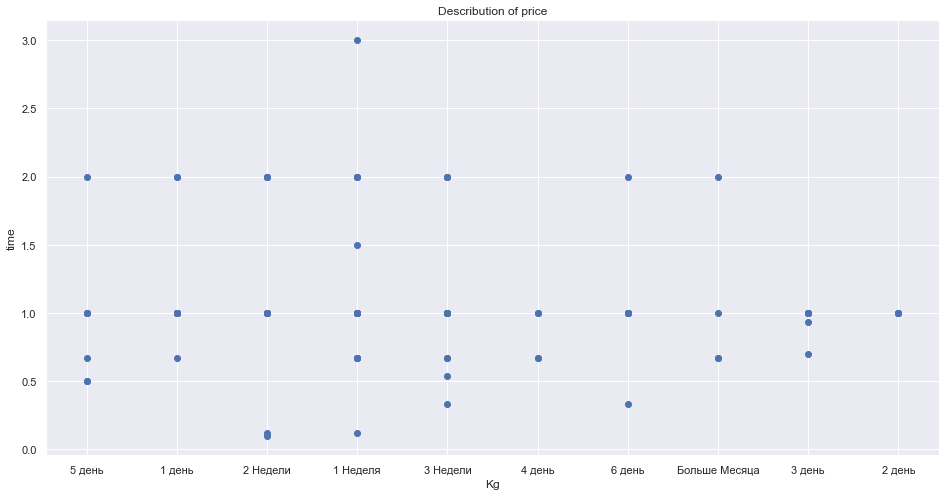

In [190]:
plt.figure(figsize=(16,8))
plt.scatter(df['time_2'], df['Kg'])
plt.xlabel('Kg')
plt.ylabel('time')
plt.title('Describution of price')
plt.show()

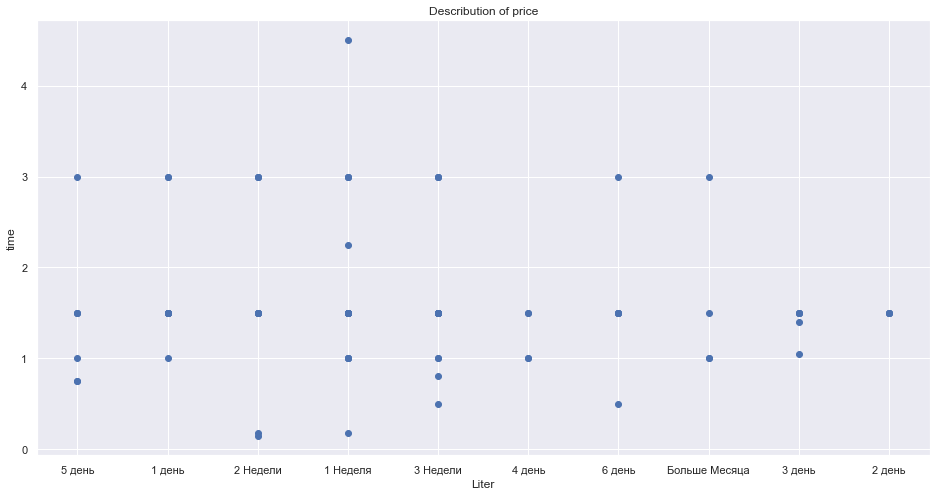

In [191]:
plt.figure(figsize=(16,8))
plt.scatter(df['time_2'], df['Liter'])
plt.xlabel('Liter')
plt.ylabel('time')
plt.title('Describution of price')
plt.show()

## 4. Исследуем зависимость с целевым признаком

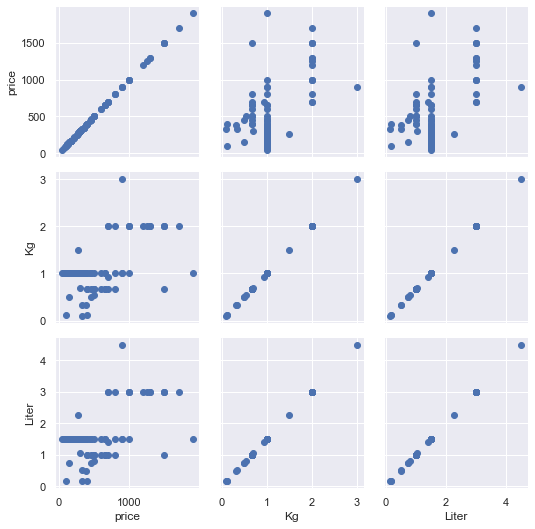

In [192]:
pair_grid_plot = sns.PairGrid(df)
pair_grid_plot.map(plt.scatter)

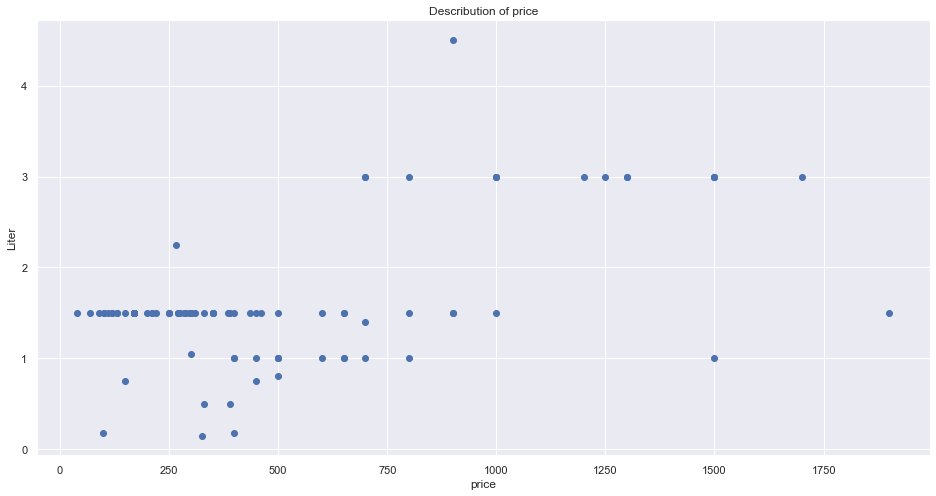

In [193]:
plt.figure(figsize=(16,8))
plt.scatter(df['price'], df['Liter'])
plt.xlabel('price')
plt.ylabel('Liter')
plt.title('Describution of price')
plt.show()

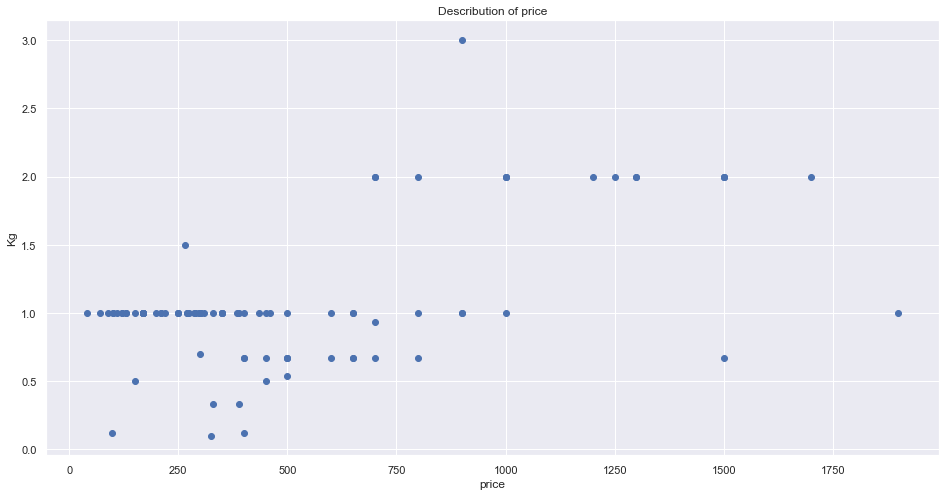

In [194]:
plt.figure(figsize=(16,8))
plt.scatter(df['price'], df['Kg'])
plt.xlabel('price')
plt.ylabel('Kg')
plt.title('Describution of price')
plt.show()

**После сопоставления вещественных признаков между собой была выявлена бинарная зависимость.**
- Данная зависимость была подтверждена и в предыдущих этапах раеализации EDA;
- Можно на основе данной зависимости обучить модель ML.

# Построение ML модели  

**Мотивация:**
- Построим ML модель для тренировочных целей, чтобы оценить степень устойчивости предсказания бинарной зависимости;
- Для обучения будет использована модель Log.regression().

## 1. Подготовка данных для обучения

In [195]:
df.head()

,title,price,lok,time,Kg,Liter,By,info,time_2
0,"Мёд дягилевый, дягилевый мед в Томске",1000.0,р-н Ленинский,5 дней назад,2.0,3.00,Роз,"Цена за 3 литра.\nМёд 2022, вкусный, очень аро...",5 день
1,Мед в Томске,1500.0,р-н Ленинский,1 день назад,2.0,3.00,Роз,"Мёд 2022 год, Самарская обл., своя пасека, цве...",1 день
2,Мёд в Томске,1250.0,р-н Кировский,2 недели назад,2.0,3.00,Роз,"Мёд.\nИз Кемеровской области, п/ст Арлюк.\n3 л...",2 Недели
3,Мёд алтайский и продукты пчеловодства в Томске,266.0,р-н Ленинский,1 неделю назад,1.5,2.25,Роз,Алтайский мёд! Подсолнечник-гречиха Район пасе...,1 Неделя
4,Мед 3 литра свежий 2022 в Томске,1300.0,р-н Ленинский,3 недели назад,2.0,3.00,Роз,Мёд цветочный 2022года ( луговые цветы).\nКачк...,3 Недели


In [196]:
df_ML = df[['Liter','Kg','price','time_2', 'By', 'lok']]
df_ML.head()

,Liter,Kg,price,time_2,By,lok
0,3.00,2.0,1000.0,5 день,Роз,р-н Ленинский
1,3.00,2.0,1500.0,1 день,Роз,р-н Ленинский
2,3.00,2.0,1250.0,2 Недели,Роз,р-н Кировский
3,2.25,1.5,266.0,1 Неделя,Роз,р-н Ленинский
4,3.00,2.0,1300.0,3 Недели,Роз,р-н Ленинский


In [197]:
vesh_priz = df_ML[['Liter','Kg','price']]
vesh_priz.head()

,Liter,Kg,price
0,3.00,2.0,1000.0
1,3.00,2.0,1500.0
2,3.00,2.0,1250.0
3,2.25,1.5,266.0
4,3.00,2.0,1300.0


In [198]:
cat_priz = df_ML[['time_2', 'By', 'lok']]
cat_priz.head()

,time_2,By,lok
0,5 день,Роз,р-н Ленинский
1,1 день,Роз,р-н Ленинский
2,2 Недели,Роз,р-н Кировский
3,1 Неделя,Роз,р-н Ленинский
4,3 Недели,Роз,р-н Ленинский


**Результат первой итерации:**
- Получили две таблицы с вещественными и категориальными признаками, для подготовки к обучению по типам признаков.

### 2. Обработка категориальных признаков

Кодирование признака будет производить методом OneHotEncoder

In [199]:
from sklearn.preprocessing import OneHotEncoder

In [200]:
cat_priz.dtypes

time_2    object
By        object
lok       object
dtype: object

In [201]:
cat_priz['time_2'].unique()

array(['5 день', '1 день', '2 Недели', '1 Неделя', '3 Недели', '4 день',
       '6 день', 'Больше Месяца', '3 день', '2 день'], dtype=object)

In [202]:
cat_priz['By'].unique()

array(['Роз', 'Опт'], dtype=object)

In [203]:
cat_priz['lok'].unique()

array(['р-н Ленинский', 'р-н Кировский', 'р-н Октябрьский',
       'р-н Советский'], dtype=object)

In [204]:
ohe = OneHotEncoder()
print(ohe)

OneHotEncoder()


In [205]:
feature_ary = ohe.fit_transform(df[["time_2"]]).toarray()
feature_labels = ohe.categories_
cat_priz_1 = pd.DataFrame(feature_ary, columns= feature_labels )
cat_priz_1.head()

,1 Неделя,1 день,2 Недели,2 день,3 Недели,3 день,4 день,5 день,6 день,Больше Месяца
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [206]:
feature_ary = ohe.fit_transform(df[["By"]]).toarray()
feature_labels = ohe.categories_
cat_priz_2 = pd.DataFrame(feature_ary, columns= feature_labels )
cat_priz_2.head()

,Опт,Роз
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [207]:
feature_ary = ohe.fit_transform(df[["lok"]]).toarray()
feature_labels = ohe.categories_
cat_priz_3 = pd.DataFrame(feature_ary, columns= feature_labels )
cat_priz_3.head()

,р-н Кировский,р-н Ленинский,р-н Октябрьский,р-н Советский
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [208]:
cat_priz = pd.concat([cat_priz_1,cat_priz_2,cat_priz_3], axis=1)
cat_priz

,1 Неделя,1 день,2 Недели,2 день,3 Недели,3 день,4 день,5 день,6 день,Больше Месяца,Опт,Роз,р-н Кировский,р-н Ленинский,р-н Октябрьский,р-н Советский
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
91,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
92,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**Результат:**
- После преобразования методом OneHotEncoder мы получили новые бинарные признаки.

### 3. Обработка вещественных признаков

**Мотивация:**
- В данной ситуации необходимо собрать целевой-бинарный признак, основываясь на оценке зависимости;
- А так же сократить разброс по признаку price, для качественной оценки весов.
- Оценить выбросы в вещественных признаков, построив ящик с усами.

In [211]:
vesh_priz = vesh_priz.reset_index(drop=True)
vesh_priz

,Liter,Kg,price
0,3.00,2.000000,1000.0
1,3.00,2.000000,1500.0
2,3.00,2.000000,1250.0
3,2.25,1.500000,266.0
4,3.00,2.000000,1300.0
...,...,...,...
90,3.00,2.000000,1500.0
91,1.50,1.000000,130.0
92,1.50,1.000000,310.0
93,0.75,0.500000,150.0


In [212]:
vesh_priz['price'] = np.log(vesh_priz['price'])
c = []
for i in vesh_priz['Kg']:
    if  i <= 1:
        c.append(0)
    else:
        c.append(1)
vesh_priz['binnary'] = c
vesh_priz

,Liter,Kg,price,binnary
0,3.00,2.000000,6.907755,1
1,3.00,2.000000,7.313220,1
2,3.00,2.000000,7.130899,1
3,2.25,1.500000,5.583496,1
4,3.00,2.000000,7.170120,1
...,...,...,...,...
90,3.00,2.000000,7.313220,1
91,1.50,1.000000,4.867534,0
92,1.50,1.000000,5.736572,0
93,0.75,0.500000,5.010635,0


<AxesSubplot:>

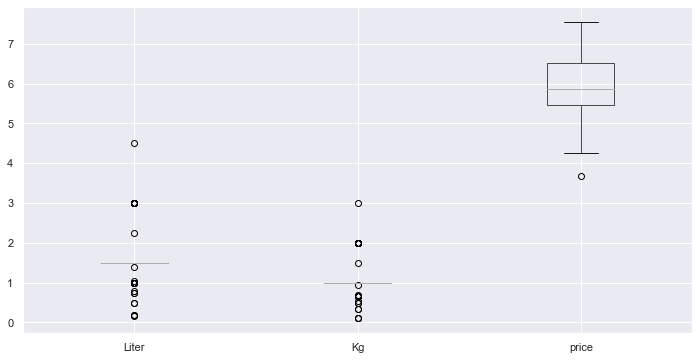

In [213]:
fig, ax = plt.subplots(figsize = (12,6))
vesh_priz.boxplot(['Liter','Kg','price'])

В признаках имеются выбросы, но они не существенны так, как две тенденции сапоставими, между собой.

**Соберём общий фрейм из полученных категориальных и вещественных признаков:**

In [214]:
df_ML = pd.concat([vesh_priz, cat_priz_1], axis=1)
df_ML.head()

,Liter,Kg,price,binnary,"(1 Неделя,)","(1 день,)","(2 Недели,)","(2 день,)","(3 Недели,)","(3 день,)","(4 день,)","(5 день,)","(6 день,)","(Больше Месяца,)"
0,3.00,2.0,6.907755,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.00,2.0,7.313220,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.00,2.0,7.130899,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.25,1.5,5.583496,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.00,2.0,7.170120,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [215]:
df_ML_bin = df_ML['binnary']
df_ML_bin.head()

0    1
1    1
2    1
3    1
4    1
Name: binnary, dtype: int64

**Итог:**
- Данные готовы на подачу в модель для обучения. 

### 4. Baseline

Сначала используем обучение модели в чистом виде, не используя вспомогательных методов

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score, f1_score, classification_report, roc_curve, log_loss

import warnings
warnings.filterwarnings("ignore");

RAND = 10
X = df_ML.drop('binnary', axis=1)
y = df_ML_bin

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y,shuffle=True, random_state=RAND)

In [218]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train )

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

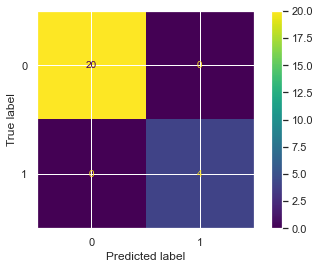

In [242]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test);

In [241]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, columns = ['TP','FN'], index = ['TP','FN'])
conf_mat

,TP,FN
TP,20,0
FN,0,4


- По полученным результатам видно,что модель не разу не ошиблась в предсказание;

In [219]:
print('roc_auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('log_loss:', log_loss(y_test, y_pred))

roc_auc: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
log_loss: 9.992007221626415e-16


In [220]:
metrics = pd.DataFrame(
            index = ['roc_auc','precision','recall','f1','log_loss'])
metrics['Baseline_LR']  = [roc_auc_score(y_test, y_score),
                           precision_score(y_test, y_pred),
                           recall_score(y_test, y_pred),
                           f1_score(y_test, y_pred),
                           log_loss(y_test, y_pred)]
metrics

,Baseline_LR
roc_auc,1.000000e+00
precision,1.000000e+00
recall,1.000000e+00
f1,1.000000e+00
log_loss,9.992007e-16


- Так же остальные метрики показывают максимальный результат, что означает максимум качества модели.

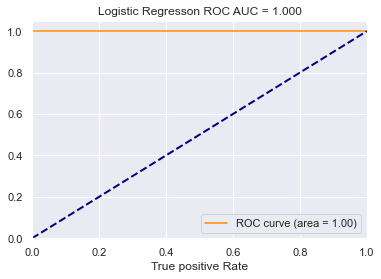

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.xlabel('True positive Rate')

plt.title('Logistic Regresson ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

- Показатель кривой ROC-AUC равен 1, что  в свою очередь подтвержает результат исследования предсказания модели. Модель охватывает все имеющиеся оценки.

**Вывод по модели:**
- Модель предсказала, что объявления будут размещаться в пропорции 1/5 - по массе на каждое расмещённое предложение с продажей по 2 кг, уже будут фигурировать 5 размещённых объявлений по 1 кг.
- Модель стоит заносить на пайплайн, для дальнейшего обучения и сравнения коэффициентов;
- Модель может быть не совсем объективна, т.к выборка не достаточно обширная. Необходимо дальше обучать модель, чтобы прогноз модели можно было считать более качественным.